# 스포츠센터 회원 이탈 예측
- use_log.csv
    - 센터 이용 이력
    - 2018.04 ~ 2019.03
- customer.csv
    - 회원 목록 (탈퇴 회원 포함)
    - 2019년 3월 말 기준
- class.csv
    - 회원 구분 데이터 (종일, 주간, 야간)
- campaign.csv
    - 가입 시 행사 종류 데이터 (입회비 할인)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

<br/>
<br/>
<br/>
<br/>

## 데이터 로드

In [2]:
# dataset/스포츠센터회원 폴더에 있는 use_log.csv 파일을 읽으세요.
df_logs = pd.read_csv("../data/use_log.csv")
df_logs

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [3]:
# 같은 폴더의 customer.csv 파일을 읽으세요.
df_user_info = pd.read_csv("../data/customer.csv")
df_user_info

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0


In [4]:
# df_user_info의 name 열을 삭제하세요.
df_user_info = df_user_info.drop('name', axis=1)
df_user_info

,customer_id,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...
4187,HD676663,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,C01,M,2019-03-14 00:00:00,NaN,CA1,0


In [5]:
# 같은 폴더의 class.csv 파일을 읽으세요.
df_class = pd.read_csv("../data/class.csv")
df_class

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [6]:
# 같은 폴더의 campaign.csv 파일을 읽으세요.
df_campaign = pd.read_csv("../data/campaign.csv")
df_campaign

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


<br/>
<br/>
<br/>
<br/>

## 데이터 병합

In [8]:
# 파편화된 데이터를 병합 합니다.
# 1. df_user_info와 df_class을 class를 기준으로 병합하세요. 
user = pd.merge(df_user_info, df_class, on='class')
user

,customer_id,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
1,PL270116,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
2,OA974876,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
3,HD024127,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
4,IK271057,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
...,...,...,...,...,...,...,...,...,...
4187,IK947853,C02,F,2019-03-09 00:00:00,NaN,CA1,0,1_주간,7500
4188,OA301090,C02,F,2019-03-12 00:00:00,NaN,CA1,0,1_주간,7500
4189,OA643695,C02,F,2019-03-12 00:00:00,NaN,CA1,0,1_주간,7500
4190,HD522396,C02,F,2019-03-13 00:00:00,NaN,CA1,0,1_주간,7500


In [9]:
# 2. user와 df_campaign을 campaign_id를 기준으로 병합하세요.
user = pd.merge(user, df_campaign, on='campaign_id')
user

,customer_id,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,IK271057,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
...,...,...,...,...,...,...,...,...,...,...
4187,IK562610,C02,F,2018-12-13 00:00:00,2019-02-28 00:00:00,CA3,1,1_주간,7500,1_입회비무료
4188,HI599354,C02,M,2018-12-13 00:00:00,NaN,CA3,0,1_주간,7500,1_입회비무료
4189,GD796859,C02,F,2018-12-14 00:00:00,NaN,CA3,0,1_주간,7500,1_입회비무료
4190,GD082270,C02,F,2018-12-14 00:00:00,2019-02-28 00:00:00,CA3,1,1_주간,7500,1_입회비무료


In [10]:
# user 데이터 프레임의 정보를 조회하세요
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   class          4192 non-null   object
 2   gender         4192 non-null   object
 3   start_date     4192 non-null   object
 4   end_date       1350 non-null   object
 5   campaign_id    4192 non-null   object
 6   is_deleted     4192 non-null   int64 
 7   class_name     4192 non-null   object
 8   price          4192 non-null   int64 
 9   campaign_name  4192 non-null   object
dtypes: int64(2), object(8)
memory usage: 360.2+ KB


<br/>
<br/>
<br/>
<br/>

## class 확인

In [11]:
# 결측치를 조회하세요.
user.isnull().sum()

customer_id         0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [12]:
# end_date컬럼이 결측치인 데이터만 선택하여 출력하세요
user[ user['end_date'].isna() ]

,customer_id,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,IK271057,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
...,...,...,...,...,...,...,...,...,...,...
4184,AS310166,C02,F,2018-12-12 00:00:00,NaN,CA3,0,1_주간,7500,1_입회비무료
4186,HD071461,C02,F,2018-12-13 00:00:00,NaN,CA3,0,1_주간,7500,1_입회비무료
4188,HI599354,C02,M,2018-12-13 00:00:00,NaN,CA3,0,1_주간,7500,1_입회비무료
4189,GD796859,C02,F,2018-12-14 00:00:00,NaN,CA3,0,1_주간,7500,1_입회비무료


In [14]:
# end_date컬럼이 결측치인 데이터의 is_deleted 컬럼의 값별 개수를 카운트 하세요.
user[ user['end_date'].isna() ]['is_deleted'].value_counts()

0    2842
Name: is_deleted, dtype: int64

In [16]:
# end_date컬럼이 결측치가 아닌 데이터의 is_deleted 컬럼의 값별 개수를 카운트 하세요.
user[ ~user['end_date'].isna() ]['is_deleted'].value_counts()

1    1350
Name: is_deleted, dtype: int64

- 결과 해석
|end_date 결측치|end_date 존재|
|--|--|
|고객 유지|고객 이탈|
|is_deleted : 0|is_deleted : 1|

<br/>
<br/>
<br/>
<br/>

## 빈도수 확인

In [25]:
# class_name 값 별 개수를 구하세요.
user['class_name'].value_counts()

0_종일    2045
2_야간    1128
1_주간    1019
Name: class_name, dtype: int64

In [26]:
# campaign_name 값 별 개수를 구하세요.
user['campaign_name'].value_counts()

2_일반         3050
0_입회비반액할인     650
1_입회비무료       492
Name: campaign_name, dtype: int64

In [27]:
# gender 값 별 개수를 구하세요.
user['gender'].value_counts()

M    2209
F    1983
Name: gender, dtype: int64

In [28]:
# is_deleted 값 별 개수를 구하세요.
user['is_deleted'].value_counts()

0    2842
1    1350
Name: is_deleted, dtype: int64

<br/>
<br/>
<br/>
<br/>

## 시계열 데이터 처리
- 가입 날짜, 탈퇴 날짜

In [32]:
# start_date 컬럼과 end_date 컬럼을 datetime 형태로 변환하세요
user['start_date'] = pd.to_datetime(user['start_date'])
user['end_date'] = pd.to_datetime(user['end_date'])

In [33]:
# datetime으로 변경을 확인하기 위해 정보를 조회하세요
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    4192 non-null   object        
 1   class          4192 non-null   object        
 2   gender         4192 non-null   object        
 3   start_date     4192 non-null   datetime64[ns]
 4   end_date       1350 non-null   datetime64[ns]
 5   campaign_id    4192 non-null   object        
 6   is_deleted     4192 non-null   int64         
 7   class_name     4192 non-null   object        
 8   price          4192 non-null   int64         
 9   campaign_name  4192 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 360.2+ KB


In [34]:
# start_date 컬럼을 기반으로 start_year, start_month, start_day 컬럼을 추가하세요
# dt 사용
user['start_year'] = user['start_date'].dt.year
user['start_month'] = user['start_date'].dt.month
user['start_day'] = user['start_date'].dt.day
user

,customer_id,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,start_year,start_month,start_day
0,OA832399,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,2015,5,1
1,PL270116,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,2015,5,1
2,OA974876,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,2015,5,1
3,HD024127,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,2015,5,1
4,IK271057,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,2015,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,IK562610,C02,F,2018-12-13,2019-02-28,CA3,1,1_주간,7500,1_입회비무료,2018,12,13
4188,HI599354,C02,M,2018-12-13,NaT,CA3,0,1_주간,7500,1_입회비무료,2018,12,13
4189,GD796859,C02,F,2018-12-14,NaT,CA3,0,1_주간,7500,1_입회비무료,2018,12,14
4190,GD082270,C02,F,2018-12-14,2019-02-28,CA3,1,1_주간,7500,1_입회비무료,2018,12,14


In [35]:
# end_date 컬럼을 기반으로 end_year, end_month, end_day 컬럼을 추가하세요
# dt 사용

user['end_year'] = user['end_date'].dt.year
user['end_month'] = user['end_date'].dt.month
user['end_day'] = user['end_date'].dt.day
user

,customer_id,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,start_year,start_month,start_day,end_year,end_month,end_day
0,OA832399,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,2015,5,1,NaN,NaN,NaN
1,PL270116,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,2015,5,1,NaN,NaN,NaN
2,OA974876,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,2015,5,1,NaN,NaN,NaN
3,HD024127,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,2015,5,1,NaN,NaN,NaN
4,IK271057,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,2015,5,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,IK562610,C02,F,2018-12-13,2019-02-28,CA3,1,1_주간,7500,1_입회비무료,2018,12,13,2019.0,2.0,28.0
4188,HI599354,C02,M,2018-12-13,NaT,CA3,0,1_주간,7500,1_입회비무료,2018,12,13,NaN,NaN,NaN
4189,GD796859,C02,F,2018-12-14,NaT,CA3,0,1_주간,7500,1_입회비무료,2018,12,14,NaN,NaN,NaN
4190,GD082270,C02,F,2018-12-14,2019-02-28,CA3,1,1_주간,7500,1_입회비무료,2018,12,14,2019.0,2.0,28.0


<br/>
<br/>
<br/>
<br/>

## 월 별 신규 회원 수, 탈퇴 회원 수 확인

In [37]:
# start_year, start_month 별 신규 회원의 수를 조회하세요
user.groupby(['start_year','start_month'])[['customer_id']].count()

customer_id
start_year start_month             
2015       5                     62
           6                     69
           7                     53
           8                     53
           9                     71
           10                    54
           11                    63
           12                    67
2016       1                     56
           2                     48
           3                     55
           4                     57
           5                     56
           6                     76
           7                     69
           8                     77
           9                     75
           10                    71
           11                    65
           12                    76
2017       1                     75
           2                     74
           3                     72
           4                     99
           5                    105
           6                     95
           7                    100
           8                    122
           9                    115
           10                    98
           11                   108
           12                   160
2018       1                    122
           2                    104
           3                     94
           4                    175
           5                    193
           6                    166
           7                    135
           8                    102
           9                     88
           10                    66
           11                    65
           12                   157
2019       1                     90
           2                     74
           3                     65

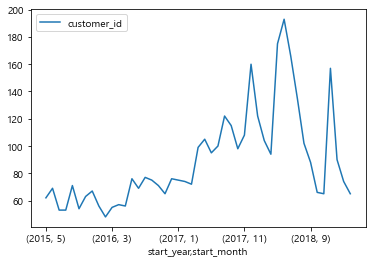

In [38]:
# 해당 결과를 시각화 하세요

user.groupby(['start_year','start_month'])[['customer_id']].count().plot(kind='line')

plt.legend()
plt.show()

In [39]:
# end_year, end_month 별 탈퇴 회원의 수를 조회하세요
user.groupby(['end_year','end_month'])[['customer_id']].count()

customer_id
end_year end_month             
2018.0   4.0                121
         5.0                125
         6.0                106
         7.0                102
         8.0                113
         9.0                104
         10.0                90
         11.0                89
         12.0               111
2019.0   1.0                129
         2.0                149
         3.0                111

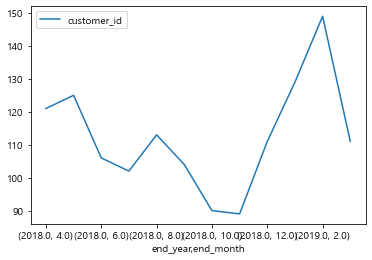

In [40]:
# 해당 결과를 시각화 하세요
user.groupby(['end_year','end_month'])[['customer_id']].count().plot(kind='line')
plt.legend()
plt.show()

<br/>
<br/>
<br/>
<br/>

## 월 별 로그 데이터 분석
- 사용자의 월 별 접속 횟수가 이탈에 영향을 미치는지 확인

In [41]:
# df_logs의 usedate 컬럼을 datetime 형식으로 변경하세요.
df_logs['usedate'] = pd.to_datetime(df_logs['usedate'])
df_logs

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [42]:
# 코드를 실행하세요.
# df_logs의 usedate 컬럼을 년월 형태로 표현하여 month 컬럼에 추가하세요. (YYYYMM)
# dt와 strftime 함수 이용
df_logs['month'] = df_logs['usedate'].dt.strftime('%Y%m')
df_logs

,log_id,customer_id,usedate,month
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [44]:
# df_logs에서 month와 customer_id 별 log_id의 개수를 구하세요.
df_logs_month = df_logs.groupby(['month','customer_id'])[['log_id']].count()
df_logs_month

log_id
month  customer_id        
201804 AS002855          4
       AS009013          2
       AS009373          3
       AS015315          6
       AS015739          7
...                    ...
201903 TS995853          8
       TS998593          8
       TS999079          3
       TS999231          6
       TS999855          4

[36842 rows x 1 columns]

In [47]:
# df_logs_month 인덱스를 초기화 하세요.
df_logs_month = df_logs_month.reset_index()
#df_logs_month.reset_index(level=['month', 'customer_id'], inplace = True)
df_logs_month

,month,customer_id,log_id
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [50]:
# df_logs_month 데이터 프레임의 log_id 컬럼의 이름을 freq로 변경하세요
df_logs_month.rename(columns={'log_id' : 'freq'}, inplace=True)
df_logs_month

,month,customer_id,freq
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [53]:
# df_logs_month 데이터 프레임의 customer_id 별 freq의 최소, 중앙값, 평균, 최대, 합계를 계산하세요.
user_log = df_logs_month.groupby('customer_id')['freq'].agg(['min','median','mean','max','sum'])
user_log

,min,median,mean,max,sum
customer_id,,,,,
AS002855,2,5.0,4.500000,7,54
AS008805,1,4.0,4.000000,8,40
AS009013,2,2.0,2.000000,2,2
AS009373,3,5.0,5.083333,7,61
AS015233,4,7.0,7.545455,11,83
...,...,...,...,...,...
TS995853,8,9.5,9.500000,11,19
TS998593,7,8.0,8.142857,9,57
TS999079,2,5.5,4.916667,9,59


In [54]:
# user_log 데이터 프레임의 인덱스를 초기화 하세요.
user_log = user_log.reset_index()
user_log

,customer_id,min,median,mean,max,sum
0,AS002855,2,5.0,4.500000,7,54
1,AS008805,1,4.0,4.000000,8,40
2,AS009013,2,2.0,2.000000,2,2
3,AS009373,3,5.0,5.083333,7,61
4,AS015233,4,7.0,7.545455,11,83
...,...,...,...,...,...,...
4187,TS995853,8,9.5,9.500000,11,19
4188,TS998593,7,8.0,8.142857,9,57
4189,TS999079,2,5.5,4.916667,9,59
4190,TS999231,1,5.0,4.666667,8,56


In [56]:
# user 데이터 프레임과 user_log 데이터 프레임을 userid를 기준으로 병합하세요
user = pd.merge(user, user_log, on='customer_id')
user

,customer_id,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,...,start_month,start_day,end_year,end_month,end_day,min,median,mean,max,sum
0,OA832399,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,...,5,1,NaN,NaN,NaN,2,5.0,4.833333,8,58
1,PL270116,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,...,5,1,NaN,NaN,NaN,3,5.0,5.083333,7,61
2,OA974876,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,...,5,1,NaN,NaN,NaN,3,5.0,4.583333,6,55
3,HD024127,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,...,5,1,NaN,NaN,NaN,2,4.5,4.833333,7,58
4,IK271057,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,...,5,1,NaN,NaN,NaN,2,3.5,3.750000,5,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,IK562610,C02,F,2018-12-13,2019-02-28,CA3,1,1_주간,7500,1_입회비무료,...,12,13,2019.0,2.0,28.0,3,4.0,5.666667,10,17
4188,HI599354,C02,M,2018-12-13,NaT,CA3,0,1_주간,7500,1_입회비무료,...,12,13,NaN,NaN,NaN,5,7.5,7.500000,10,30
4189,GD796859,C02,F,2018-12-14,NaT,CA3,0,1_주간,7500,1_입회비무료,...,12,14,NaN,NaN,NaN,6,7.5,7.250000,8,29
4190,GD082270,C02,F,2018-12-14,2019-02-28,CA3,1,1_주간,7500,1_입회비무료,...,12,14,2019.0,2.0,28.0,3,5.0,6.000000,10,18


<br/>
<br/>
<br/>
<br/>

## ML (Classification)

In [57]:
# user 데이터 프레임을 조회하세요.
user

,customer_id,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,...,start_month,start_day,end_year,end_month,end_day,min,median,mean,max,sum
0,OA832399,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,...,5,1,NaN,NaN,NaN,2,5.0,4.833333,8,58
1,PL270116,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,...,5,1,NaN,NaN,NaN,3,5.0,5.083333,7,61
2,OA974876,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,...,5,1,NaN,NaN,NaN,3,5.0,4.583333,6,55
3,HD024127,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,...,5,1,NaN,NaN,NaN,2,4.5,4.833333,7,58
4,IK271057,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,...,5,1,NaN,NaN,NaN,2,3.5,3.750000,5,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,IK562610,C02,F,2018-12-13,2019-02-28,CA3,1,1_주간,7500,1_입회비무료,...,12,13,2019.0,2.0,28.0,3,4.0,5.666667,10,17
4188,HI599354,C02,M,2018-12-13,NaT,CA3,0,1_주간,7500,1_입회비무료,...,12,13,NaN,NaN,NaN,5,7.5,7.500000,10,30
4189,GD796859,C02,F,2018-12-14,NaT,CA3,0,1_주간,7500,1_입회비무료,...,12,14,NaN,NaN,NaN,6,7.5,7.250000,8,29
4190,GD082270,C02,F,2018-12-14,2019-02-28,CA3,1,1_주간,7500,1_입회비무료,...,12,14,2019.0,2.0,28.0,3,5.0,6.000000,10,18


In [58]:
# 코드를 실행하세요.
# user 데이터 프레임에서 다음의 결과와 같이 컬럼을 선택 후 df 변수에 저장하세요.
df = user[['gender', 'is_deleted', 'class_name', 'price', 'campaign_name', 'min', 'max', 'median', 'max', 'sum']]
df

,gender,is_deleted,class_name,price,campaign_name,min,max,median,max,sum
0,F,0,0_종일,10500,2_일반,2,8,5.0,8,58
1,M,0,0_종일,10500,2_일반,3,7,5.0,7,61
2,M,0,0_종일,10500,2_일반,3,6,5.0,6,55
3,F,0,0_종일,10500,2_일반,2,7,4.5,7,58
4,M,0,0_종일,10500,2_일반,2,5,3.5,5,45
...,...,...,...,...,...,...,...,...,...,...
4187,F,1,1_주간,7500,1_입회비무료,3,10,4.0,10,17
4188,M,0,1_주간,7500,1_입회비무료,5,10,7.5,10,30
4189,F,0,1_주간,7500,1_입회비무료,6,8,7.5,8,29
4190,F,1,1_주간,7500,1_입회비무료,3,10,5.0,10,18


In [59]:
# df에서 is_deleted 컬럼을 Y로, 나머지를 X로 설정하세요
X = df.drop(columns='is_deleted')
Y = df['is_deleted']

In [60]:
# X를 출력하세요.
X

,gender,class_name,price,campaign_name,min,max,median,max,sum
0,F,0_종일,10500,2_일반,2,8,5.0,8,58
1,M,0_종일,10500,2_일반,3,7,5.0,7,61
2,M,0_종일,10500,2_일반,3,6,5.0,6,55
3,F,0_종일,10500,2_일반,2,7,4.5,7,58
4,M,0_종일,10500,2_일반,2,5,3.5,5,45
...,...,...,...,...,...,...,...,...,...
4187,F,1_주간,7500,1_입회비무료,3,10,4.0,10,17
4188,M,1_주간,7500,1_입회비무료,5,10,7.5,10,30
4189,F,1_주간,7500,1_입회비무료,6,8,7.5,8,29
4190,F,1_주간,7500,1_입회비무료,3,10,5.0,10,18


In [61]:
# Y를 출력하세요.
Y

0       0
1       0
2       0
3       0
4       0
       ..
4187    1
4188    0
4189    0
4190    1
4191    0
Name: is_deleted, Length: 4192, dtype: int64

In [62]:
# X를 One Hot 변환하세요
X = pd.get_dummies(X)
X

,price,min,max,median,max,sum,gender_F,gender_M,class_name_0_종일,class_name_1_주간,class_name_2_야간,campaign_name_0_입회비반액할인,campaign_name_1_입회비무료,campaign_name_2_일반
0,10500,2,8,5.0,8,58,1,0,1,0,0,0,0,1
1,10500,3,7,5.0,7,61,0,1,1,0,0,0,0,1
2,10500,3,6,5.0,6,55,0,1,1,0,0,0,0,1
3,10500,2,7,4.5,7,58,1,0,1,0,0,0,0,1
4,10500,2,5,3.5,5,45,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,7500,3,10,4.0,10,17,1,0,0,1,0,0,1,0
4188,7500,5,10,7.5,10,30,0,1,0,1,0,0,1,0
4189,7500,6,8,7.5,8,29,1,0,0,1,0,0,1,0
4190,7500,3,10,5.0,10,18,1,0,0,1,0,0,1,0


In [67]:
# X와 Y를 Train 과 Test로 분할하세요.
# stratify=Y, random_state=0

from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,Y,random_state=0,stratify=Y
)

In [68]:
# KNN 알고리즘을 이용하여 분류하세요.

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )


0.9793256997455471 0.9713740458015268


In [69]:
# LogisticRegression 알고리즘을 이용하여 분류하세요.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )

0.9688295165394402 0.9656488549618321


C:\Users\onegt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
# DecisionTree 알고리즘을 이용하여 분류하세요.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )

0.9971374045801527 0.9713740458015268


In [74]:
# 학습된 DecisionTree 모델의 feature_importances_를 Series로 변환하세요. (index = X.columns)
fi = pd.Series(model.feature_importances_, index = X.columns)
fi

price                      0.001411
min                        0.018548
max                        0.014619
median                     0.320422
max                        0.008339
sum                        0.596739
gender_F                   0.003409
gender_M                   0.000245
class_name_0_종일            0.004610
class_name_1_주간            0.003117
class_name_2_야간            0.003091
campaign_name_0_입회비반액할인    0.005896
campaign_name_1_입회비무료      0.003723
campaign_name_2_일반         0.015830
dtype: float64

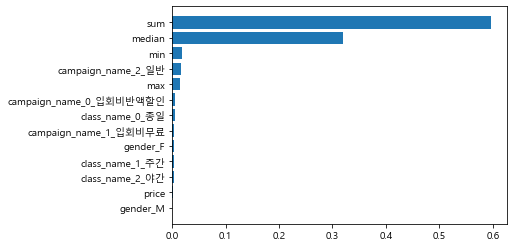

In [77]:
# 변환된 결과를 시각화 하세요.
fi.sort_values(inplace=True)
plt.barh(fi.index, fi.values)

plt.show()

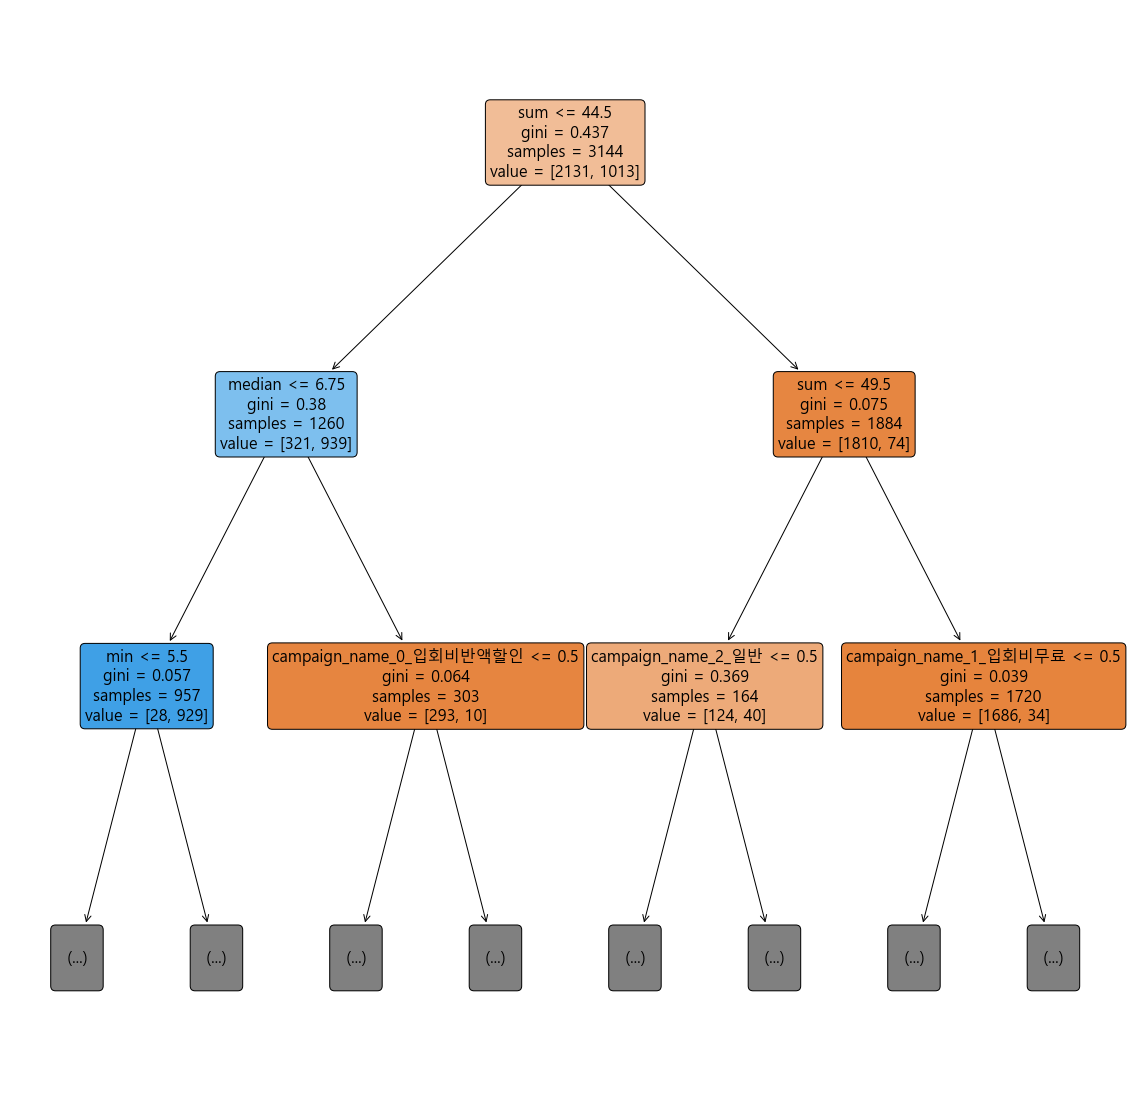

In [81]:
# 트리를 시각화하세요.
# max_depth = 2,
# feature_names = X.columns
# fontsize = 16
# filled = True
# rounded = True

from sklearn.tree import plot_tree

plt.figure(figsize = (20,20))

plot_tree(
    decision_tree= model, 
    max_depth = 2, 
    feature_names = X.columns, 
    fontsize = 16, 
    filled = True, 
    rounded = True)

plt.show()